# Import Libs

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing and Creating Dataset

In [9]:
df =pd.read_csv('/Users/harmansingh/AI Engineering/Machine Learning/Clustering/Project/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [12]:
x=df.iloc[:,[3,4]].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

# Heirarcial Clustering

## Dendrogram

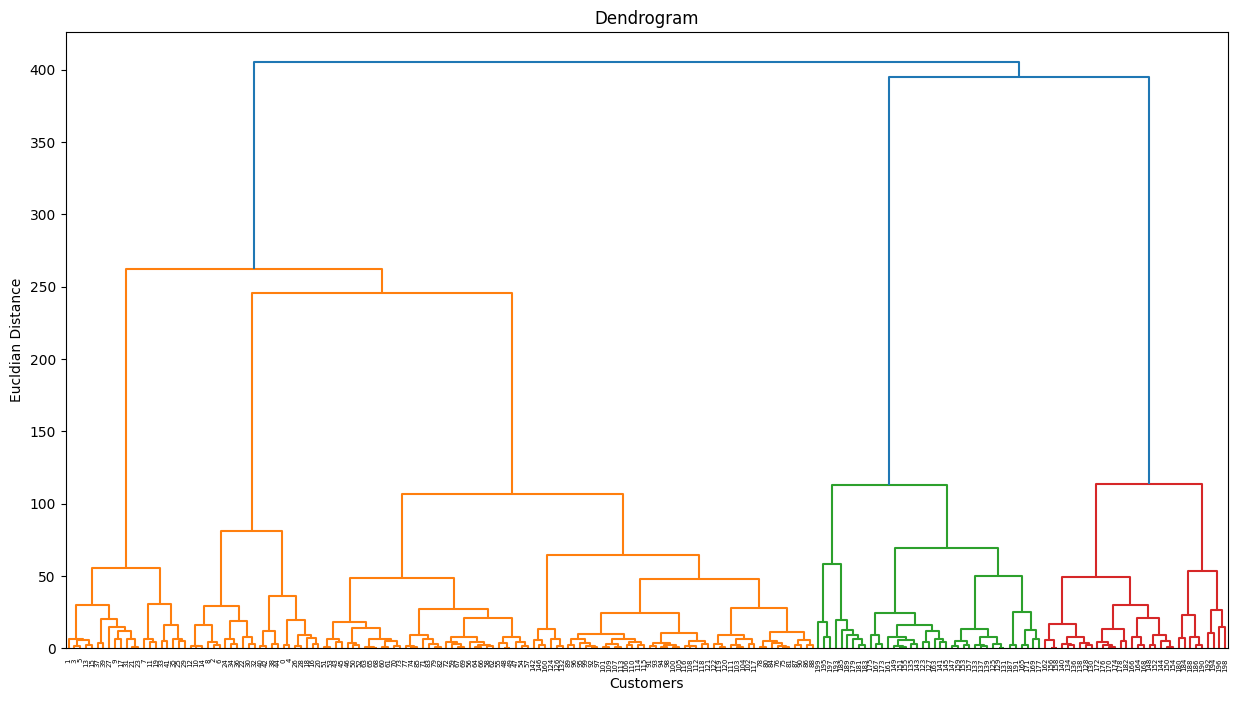

In [19]:
from scipy.cluster import hierarchy as sch
plt.figure(figsize=(15,8))
dendrogram = sch.dendrogram(sch.linkage(x,method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucldian Distance')
plt.show()

## Training The Model

In [28]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,linkage='ward')
y_hc =hc.fit_predict(x)
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

## Vizualising

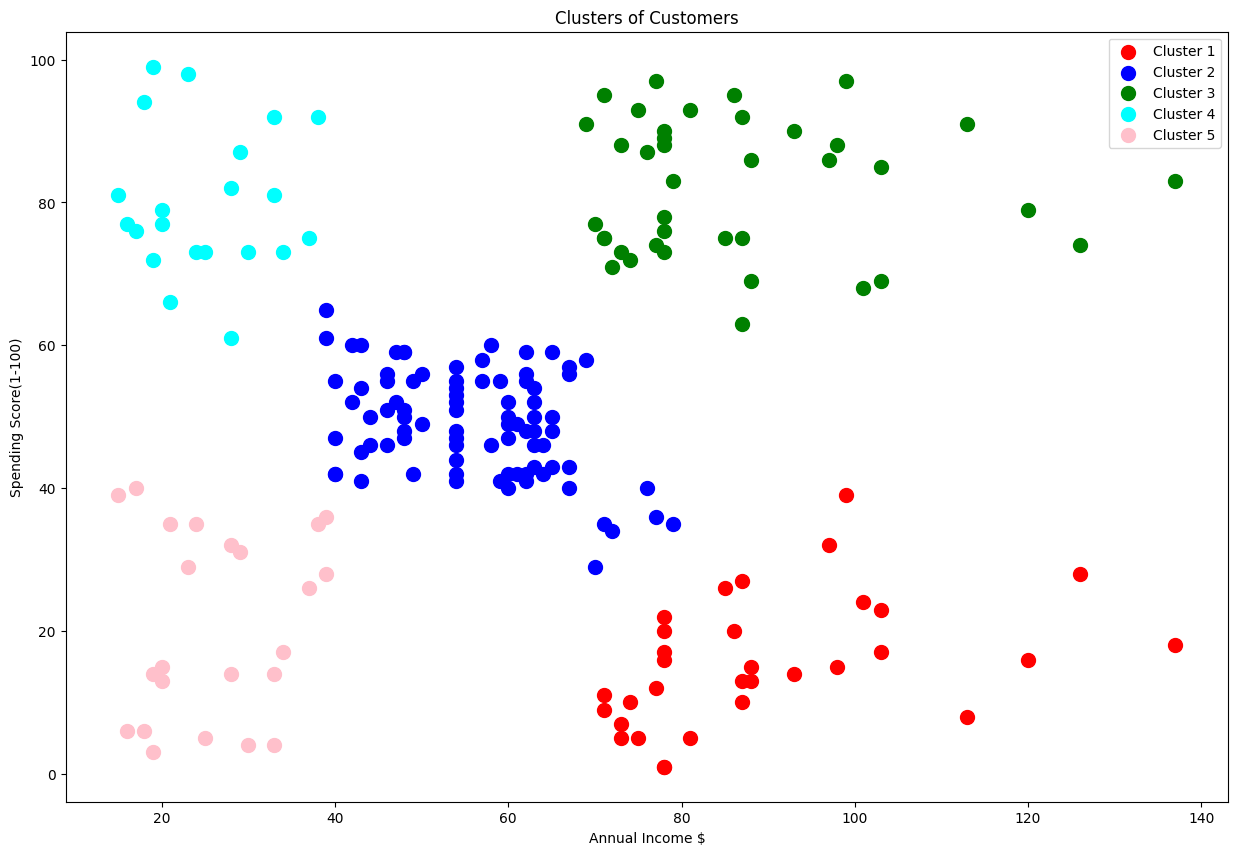

In [31]:
plt.figure(figsize=(15,10))
plt.scatter( x[y_hc==0,0], x[y_hc==0,1] , color='red', label= 'Cluster 1', s=100)
plt.scatter( x[y_hc==1,0], x[y_hc==1,1] , color='blue', label= 'Cluster 2', s=100)
plt.scatter( x[y_hc==2,0], x[y_hc==2,1] , color='green', label= 'Cluster 3', s=100)
plt.scatter( x[y_hc==3,0], x[y_hc==3,1] , color='cyan', label= 'Cluster 4', s=100)
plt.scatter( x[y_hc==4,0], x[y_hc==4,1] , color='pink', label= 'Cluster 5', s=100)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income $')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# K-Means Clustering

## Using Elbow Method for Optimal No of Clusters

/opt/anaconda3/envs/tf-m1/lib/python3.9/site-packages/threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/var/folders/sd/3vycw8hs7qggzsr43dq5vgh00000gn/T/ipykernel_22831/161007617.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


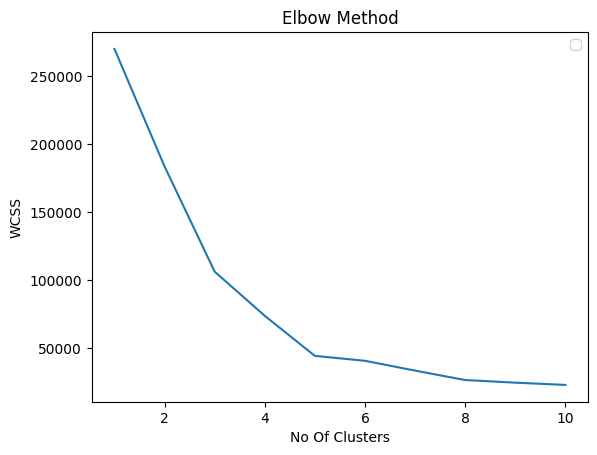

In [38]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmean=KMeans(n_clusters=i, init ='k-means++', random_state=42)
    kmean.fit(x)
    wcss.append(kmean.inertia_)

plt.plot( range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('No Of Clusters')
plt.ylabel('WCSS')
plt.legend()
plt.show()

## Training The Model With Optimal No of Clusters

In [43]:
from sklearn.cluster import KMeans
kmean= KMeans( n_clusters=5, init='k-means++', random_state=42)
kmean.fit(x)

KMeans(n_clusters=5, random_state=42)

## Predicting

In [48]:
y_kmean= kmean.predict(x)
y_kmean

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 3, 1, 0, 1, 3, 1, 3, 1,
       0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 0, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

## Visualizing The Clusters

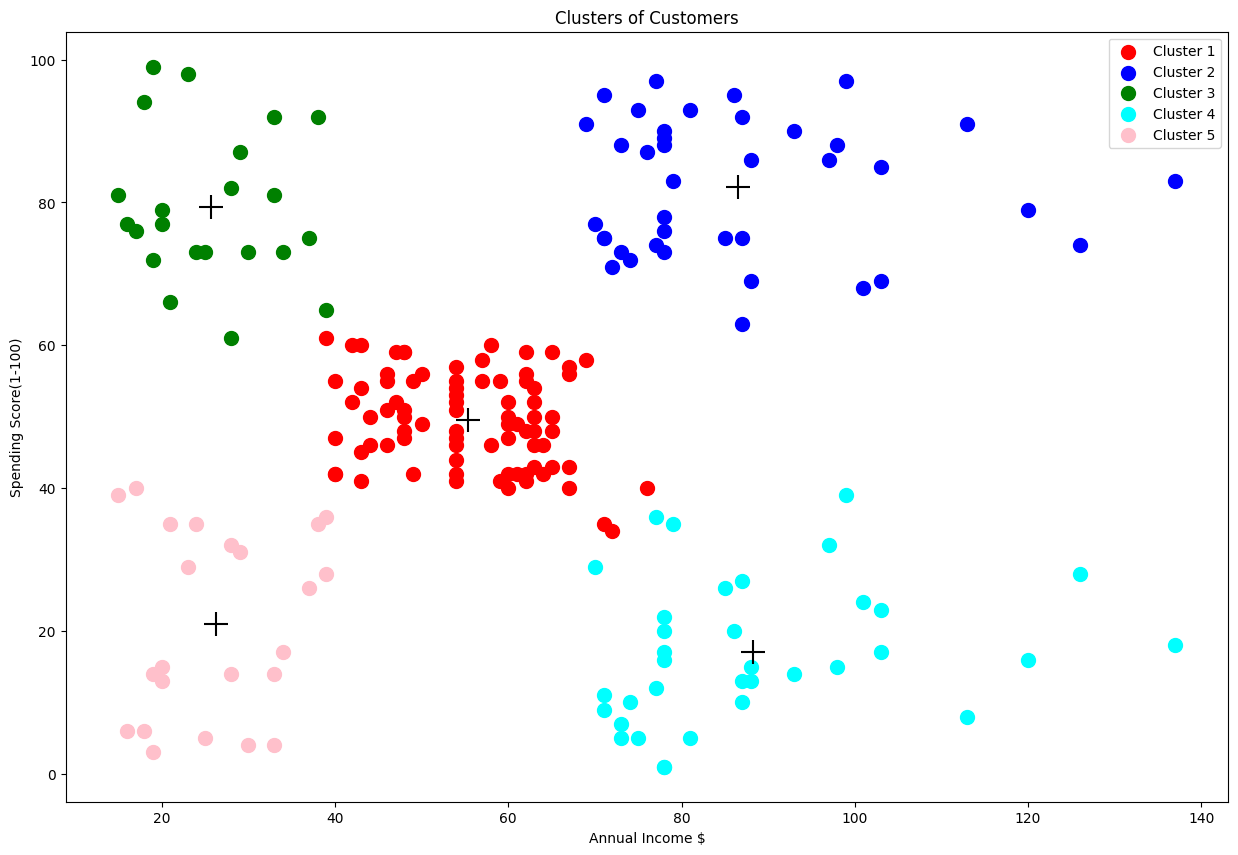

In [53]:
plt.figure(figsize=(15,10))
plt.scatter( x[y_kmean==0,0], x[y_kmean==0,1] , color='red', label= 'Cluster 1', s=100)
plt.scatter( x[y_kmean==1,0], x[y_kmean==1,1] , color='blue', label= 'Cluster 2', s=100)
plt.scatter( x[y_kmean==2,0], x[y_kmean==2,1] , color='green', label= 'Cluster 3', s=100)
plt.scatter( x[y_kmean==3,0], x[y_kmean==3,1] , color='cyan', label= 'Cluster 4', s=100)
plt.scatter( x[y_kmean==4,0], x[y_kmean==4,1] , color='pink', label= 'Cluster 5', s=100)
plt.scatter( kmean.cluster_centers_[:,0],kmean.cluster_centers_[:,1], color='black', marker='+', s=300)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income $')
plt.ylabel('Spending Score(1-100)')
plt.legend()
plt.show()

# Compairing Both

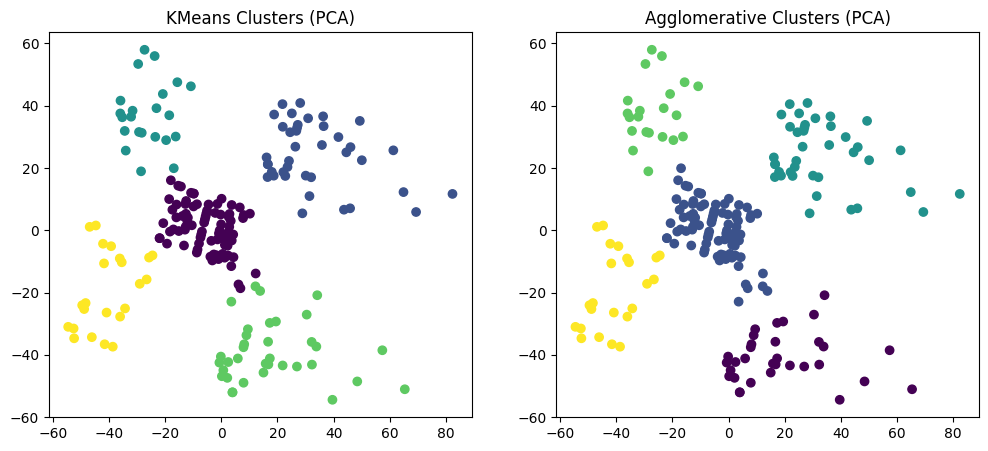

In [71]:
from sklearn.decomposition import PCA


pca = PCA(n_components=2)
reduced = pca.fit_transform(x)

plt.figure(figsize=(12,5))

# KMeans
plt.subplot(1,2,1)
plt.scatter(reduced[:,0], reduced[:,1], c=y_kmean, cmap='viridis')
plt.title("KMeans Clusters (PCA)")

# Agglomerative
plt.subplot(1,2,2)
plt.scatter(reduced[:,0], reduced[:,1], c=y_hc, cmap='viridis')
plt.title("Agglomerative Clusters (PCA)")

plt.show()